# Notebook Projet Python - Cryptomonnaies et écologie : la part d'ombre d'une révolution moderne

Inspiré par les objectifs ambitieux de l’Accord de Paris sur le climat issu de la COP21 (2015), plusieurs entreprises privées et ONG internationales des secteurs financiers et énergétiques ont décidé de s’engager pour la création d’un Crypto Climate Accord en mars 2021, initiative soutenue par le Forum Économique mondial (FEM) et l’UNFCC (United Nations Climate Change) visant la neutralité carbone pour les cryptomonnaies à l’horizon 2030. 
Ce projet illustre la prise de conscience progressive par les professionnels du secteur comme par les particuliers de l’impact environnemental fort des cryptomonnaies, du fait de l’explosion de la demande pour celles-ci en une dizaine d’années seulement.  

On désigne par cryptomonnaies un ensemble de monnaies numériques émises de pair à pair, reposant sur une blockchain et dont la création monétaire (le « minage »), ne nécessitant pas l’existence d’une banque centrale, se produit suivant des schémas algorithmiques similaires aux logiques de découverte de l’or : une ressource épuisable, de plus en plus complexe et coûteuse à découvrir, augmentant ainsi sa valeur avec le temps.  
Depuis l’apparition des cryptomonnaies de première génération avec la création du Bitcoin en 2009, et plus encore depuis le premier boom du cours de cette « monnaie » en 2013, le secteur a connu un croissance exceptionnelle, se traduisant à la fois par la multiplication  des cryptomonnaies,  près de 15 617(1) différentes au 14 juin 2021, et par l’augmentation des échanges de celles-ci, pour une valeur totale de 2 031(1) milliards de dollars à cette même date, soit quasiment 90% du PIB français. Actuellement, les 5 principales cryptomonnaies échangées sont : le Bitcoin, l’Ethereum, le Ripple, le Bitcoin cash et le Litecoin.  

Cette croissance du marché des cryptomonnaies, et le fonctionnement même de leur minage, a causé en parallèle un impact écologique de plus en plus lourd. De fait, l’émission, et dans une moindre mesure la diffusion, des différentes cryptomonnaies nécessitant un flux important d’électricité, engendrent ainsi des émissions de carbone fortes pour ce secteur. Ce fait est progressivement admis par l’ensemble des acteurs du marché, comme le montre le Crypto Climate Accord mentionné précédemment ainsi que les nombreux projets autour de l’Ethereum pour réduire drastiquement ses émissions par des évolutions sur sa blockchain(2). Néanmoins, l’ampleur exacte de l’empreinte énergétique des cryptomonnaies semble peu connu du grand public, et notamment des acheteurs, ceci pouvant s’expliquer en partie par la diversité des estimations avancées par de nombreuses sources scientifiques. 

Ainsi, le premier enjeu majeur de notre mémoire sera de quantifier et modéliser précisément cet impact énergétique du minage des cryptomonnaies et de le comparer avec des ordres de grandeur semblables (consommation énergétique d’un pays). 

En allant plus loin, nous chercherons à localiser les régions où sont minées les cryptomonnaies, pour comprendre quels territoires subissent les impacts écologiques de la forte empreinte énergétique. 

Un dernier enjeu clé de la relation entre cryptomonnaies et écologie que nous analyserons sera celui des déchets électroniques créés par le minage, comme les machines ASICs inutilisées dès qu’elles ne sont plus rentables. Angle-mort de nombreuses recherches scientifiques sur le sujet, cette approche nous permettra de développer un autre aspect de l’impact environnemental des cryptomonnaies. 

Finalement : 

>#  Dans quelle mesure les cryptomonnaies, véritable révolution technologique et économique, ont un impact écologique néfaste / lourd ?


(1) : D’après les données de CoinMarketCap, https://coinmarketcap.com/

(2) : Article de The Guardian, Mai 2021 : https://www.theguardian.com/technology/2021/may/19/ethereum-cryptocurrency-to-slash-carbon-emissions

# 0. Importations

In [17]:
!pip install plotly

     |████████████████████████████████| 26.5 MB 40.3 MB/s eta 0:00:01


In [22]:
import numpy as np
from numpy import log

import pandas as pd  
from pandas import json_normalize

import matplotlib.pyplot as plt 
import plotly.express as px

import statistics
import urllib
import bs4

import statsmodels.api as sm
import seaborn as sns
import json

## I. L’empreinte écologique de Bitcoin, un terrain miné

Comme tout le secteur du numérique, les cryptomonnaies contribuent indirectement aux émissions de gaz à effet de serre par l’électricité qu’elles consomment. Qu'en est-il de la plus emblématique d’entre-elles, le Bitcoin ? Pour répondre à cette question, nous avons mené une étude statistique portant sur l'impact écologique du processus de minage, vecteur principal de la consommation électrique du Bitcoin.

Cf. Annexe : "Le minage : un processus énergivore" pour comprendre le fonctionnement technique du minage de cryptomonnaies

Notre problématique fondamentale dans un premier temps est de savoir : 

> Comment quantifier la consommation électrique du Bitcoin ?

> <b> I.1 - Méthodologie </b> 

L'indice de consommation électrique du Bitcoin fournit une estimation de la charge électrique quotidienne du réseau Bitcoin. Le modèle technico-économique sous-jacent est basé sur une approche ascendante qui utilise le seuil de rentabilité de différents types d'équipements de minage comme point de départ.


Étant donné que la consommation électrique exacte ne peut être déterminée, nous souhaitions fournir une fourchette hypothétique composée d'une estimation de la limite inférieure et supérieure. Dans les limites de cette fourchette, une estimation réaliste de la consommation électrique du Bitcoin est calculée pour fournir un chiffre se rapprochant de la consommation électrique réelle de Bitcoin.

L'estimation de la limite inférieure correspond à la dépense totale d'électricité minimale théorique basée sur l'hypothèse la plus favorable selon laquelle tous les mineurs utilisent toujours le matériel le plus économe en énergie disponible sur le marché. L'estimation de la limite supérieure correspond à la dépense totale théorique maximale d'électricité basée sur l'hypothèse la plus défavorable selon laquelle tous les mineurs utilisent toujours le matériel le moins économe en énergie disponible sur le marché, tant que l'exploitation de ce matériel reste rentable en termes d'électricité. L'estimation de la consommation électrique réelle est basée sur l'hypothèse plus réaliste que les mineurs utilisent un panier de matériel rentable plutôt qu'un seul mineur. Le modèle prend en compte les paramètres décrits dans le tableau ci-dessous.





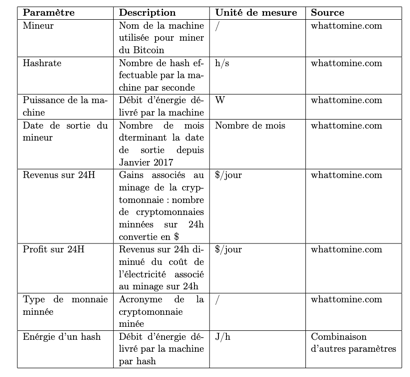

Dans les premières années du bitcoin, le minage était principalement réalisé à l'aide de processeurs graphiques (GPU) et de réseaux de portes programmables (FPGA) à usage général. La situation a considérablement changé lorsqu'en 2012, les premiers circuits intégrés spécifiques aux applications (ASIC) ont commencé à apparaître. Les ASIC sont des matériels spécialisés spécifiquement optimisés pour le minage de bitcoins, qui sont des ordres de grandeur plus efficaces que les dispositifs précédemment utilisés pour le minage. Par conséquent, il n'a pas fallu longtemps pour que les ASIC dominent et finissent par supplanter les GPU et FPGA.

Nous avons compilé une liste de près de 100 modèles différents d'ASIC Bitcoin conçus pour les opérations SHA-256 qui ont été mis sur le marché depuis 2017. La liste est basée sur une ressource publique qui répertorie divers types d'équipements de minage et leurs spécifications. 

L'efficacité minière (énergie) de chaque type de machine est exprimée en Joules par hash (J/h). La figure suivante montre l'évolution de l'efficacité des équipements de minage de Bitcoin depuis début 2017. Celle-ci montre une évolution constante de l'efficacité énergétique des équipements de minage, puisque la décroissance de la courbe se produit sur des valeurs négatives.

In [42]:
%run "./WebScraping équipement de minage.ipynb"

In [43]:
df=df.assign(Energie=df['Power Consumption']/df['Hashrate'])

In [44]:
table_BTC = df.loc[ (df['Monnaie 3']=='BTC') | (df['Monnaie 3']=='BCH') | (df['Monnaie 2']=='BTC') | (df['Monnaie 2']=='BCH')]

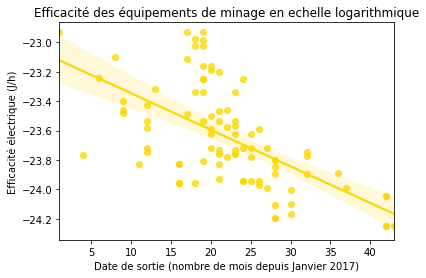

In [45]:
figure_1=sns.regplot(x=table_BTC["Date"], y=np.log(table_BTC["Energie"]), fit_reg=True, color='gold')
figure_1.set_xlabel('Date de sortie (nombre de mois depuis Janvier 2017)')
figure_1.set_ylabel("Efficacité électrique (J/h)" )
plt.title('Efficacité des équipements de minage en echelle logarithmique')
plt.show()

Pour constituer notre intervalle de confiance quant à la consommation électrique du Bitcoin, on se base sur les résultats présentés par le graphique. En effet, toutes les machines constitutives de ce graphique sont rentables. Ainsi, on peut faire l'hypothèse que les mineurs ayant acheté l'un de ces appareils l'utilise encore. Pour fera l'hypothèse que tous les mineurs utilisent des machines économes. Le raisonnement inverse sera mené pour construire une limite supérieure. En ce qui concerne la valeur approximative, nous ferons l'hypothèse forte mais nécessaire que toutes les machines rentables sont utilisées de manière équiprobable. Pour mener à bien, nous nécessitions la nombre de hash agrégé par seconde. Pour ce faire, on se base sur les données apportées par le site BTC.com, qui nous fournit le nombre de hash effectué par seconde par chaque pool de minage. Un technique de WebScraping nous renvoie les résultats suivants :


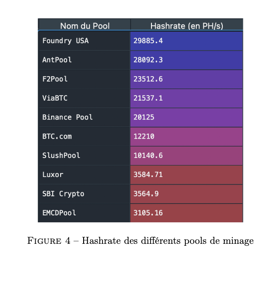

La formule suivante nous donne alors la consommation électrique annuelle du Bitcoin en Wh :

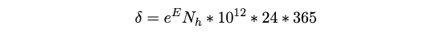

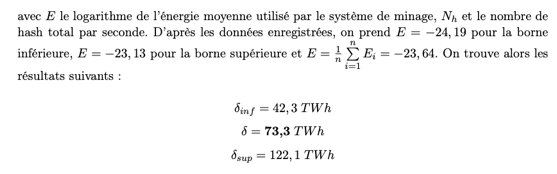

Nous trouvons donc que le minage du Bitcoin nécessite une consommation d'électricité de <b>73,3 TWh</b> par an, encadrée par une borne supérieure de 122,1 Twh et une borne inférieure de 42,3 Twh. Nos résultats sont cohérents par rapport aux estimations de nombreuses sources scientifiques, mais sont légèrement sous-estimées par rapport aux chiffres du Cambridge Bitcoin Electricity Consumption Index (2021), qui s'impose comme les données référentes sur le sujet actuellement. Ils ont en effet déterminé une consommation d'électricité pour le Bitcoin proche de notre borne supérieure : 124 TWh par an. 

# II. Visualisation du minage de cryptomonnaies 


> <b> II.1 Consommation électrique du Bitcoin en 2019 </b>

Nous avons d'abord cherché à donner un ordre de grandeur à l'électricité consommée par le minage de cryptomonnaie. Pour cela, nous avons comparé la valeur trouvée dans la première partie à la consommation électrique de plusieurs pays. 

L'objectif fondamental de cette démarche est d'expliciter clairement l'empreinte énergétique des cryptomonnaies, et de faciliter la compréhension de celle-ci. Le fait de comparer cette consommation énergétique avec celle de pays est une démarche empruntée à de nombreux articles scientifiques récents. Cet outil de comparaison a l'avantage de représenter l'ampleur de l'empreinte énergétique des cryptomonnaies.  
 

In [23]:
pays_elec_json="https://raw.githubusercontent.com/GeoffroyENSAE/Cryptomonnaies-et-ecologie/main/pays_electricte_2019.json"
#g = open(pays_elec_json)
#h = json.load(g)

pays_elec=pd.read_json(pays_elec_json)

#On isole le nom du pays et on supprime les colonnes inutiles
pays_elec=pays_elec.join(pays_elec['name'].str.split(',', expand=True).rename(columns={0:'A', 1:'country',2:'C',3:'D'}))
pays_elec= pays_elec.drop(['series_id', 'frequency', 'productid', 'activityid', 'iso','A','C','D','name'],axis=1)

In [24]:
#on récupère la consommation énérgétique du pays 
for i in range(pays_elec.shape[0]):
    pays_elec['data'].iloc[i]=pays_elec['data'].iloc[i][0]['value']
    
#on donne 0 comme valeur lorsque la consommation énergétique n'est pas un nombre pour pouvoir trier les valeurs    
for i in range(227):
    if type(pays_elec['data'].iloc[i])==int :
        pays_elec['data'].iloc[i]=float(pays_elec['data'].iloc[i])
    elif type(pays_elec['data'].iloc[i])!=float :
        pays_elec['data'].iloc[i]=0 

In [25]:
#on ajoute les valeurs du Bitcoin et on trie les valeurs 
pays_elec=pays_elec.append({'unit' : 'BKWH', 'data' : 73.3,'country':'Bitcoin'} , ignore_index=True).sort_values(by = 'data',ascending=False)
pays_elec=pays_elec.append({'unit' : 'BKWH', 'data' : 42.3,'country':'Bitcoin_inf'} , ignore_index=True).sort_values(by = 'data',ascending=False)
pays_elec=pays_elec.append({'unit' : 'BKWH', 'data' : 122.1,'country':'Bitcoin_sup'} , ignore_index=True).sort_values(by = 'data',ascending=False).reset_index(drop=True)


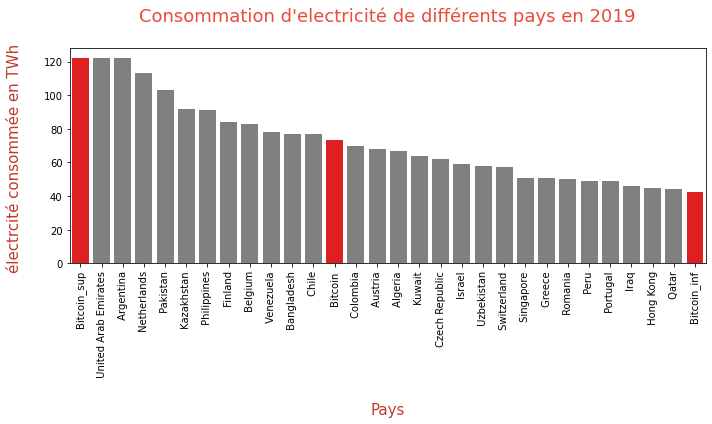

In [26]:
#on ne garde que les pays avec des consommations énergétiques comparables au bitcoin et on ajoute le bitcoin à ce df
new_pays_elec=pays_elec.iloc[30:60,:]

# on réalise ensuite un graphique en barres
plt.figure(figsize=(10,6))
palette=['red' if (x=="Bitcoin_sup"or x=="Bitcoin"or x=="Bitcoin_inf" ) else 'grey' for x in new_pays_elec['country']]
sns.barplot(x=new_pays_elec['country'], y=new_pays_elec['data'], palette=palette)
plt.xlabel('\nPays', fontsize=15, color='#c0392b')
plt.ylabel("électrcité consommée en TWh \n", fontsize=15, color='#c0392b')
plt.title("Consommation d'electricité de différents pays en 2019\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation=90)
plt.tight_layout()


<b> ANALYSE DU GRAPHIQUE </b> 

Ainsi, nous avons déterminé que l'empreinte énergétique du minage du seul Bitcoin représentait la consommation énergétique de pays comme le Chili (19,2 millions d'habitants, 61ème population mondiale) et la Colombie (51,2 millions d'habitants, 29ème population mondiale), avec une consommation avoisinant de 73,3 TWh par an, comme calculé précédemment.  

Il faut cependant rappeler qu'il existe une marge d'incertitude par rapport à cette valeur. Par précaution, nous avons donc déterminé une borne supérieure (122,1 Twh) et une borne inférieure (42,3 Twh) pour encadrer la valeur de l'empreinte énergétique déterminée. En prenant en compte ces deux valeurs, la consommation énergétique du Bitcoin serait alors davantage comparable à celle de deux pays du Golfe : les Émirats Arabes Unis pour la borne supérieure, le Qatar pour la borne inférieure. À noter que dans le Cambridge Bitcoin Electricity Consumption Index (2021), le Bitcoin se place entre les Émirats Arabes Unis et la Norvège, ce qui est logique dans la mesure où la valeur de consommation d'électricité était légèrement supérieure à notre borne supérieure.

Dans tous les cas, force est de constater que les ordres de grandeurs comparables à la consommation d'électricité du Bitcoin ne sont pas ceux de pays sous-dévelopées. Cette empreinte énergétique se situe au niveau de celles de pays de l'Union Européenne (Pays-Bas, Belgique, Autriche, Portugual,...), de grands pays densément peuplés d'Amérique du Sud (Argentine, Colombie,...), de pays moins densément peuplés mais très riches (Quatar, EUA,...) et enfin de pays producteurs et exportateurs de nombreuses marchandises du commerce international (Bangladesh, Pakistan,...). 

Cela incarne indubitablement le <b> poids environnemental lourd du minage de Bitcoin </b>, et laisse présager un impact encore plus lourd si l'ensemble des cryptomonnaies minées étaient prises en compte. 

Pour donner une autre représentation et préciser encore l'ampleur de cet impact environnemental néfaste, nous avons décidé de comparer la consommation électrique du Bitcoin en 2019 à celle d'un pays dont l'on connaît bien les modes de vie : la France.  

<ipython-input-27-bd84c4cf6159>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays_reduit['data']=pays_reduit['data']/pays_reduit['data'].iloc[0]*100
<ipython-input-27-bd84c4cf6159>:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


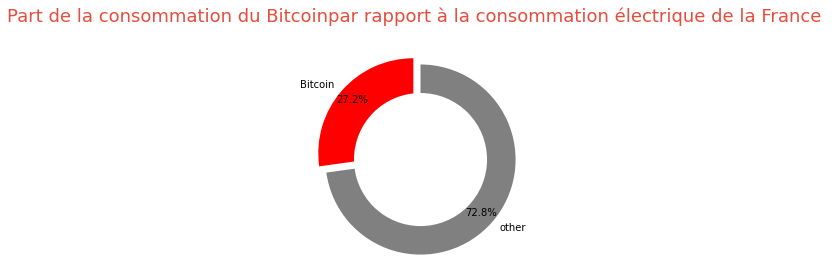

In [27]:
pays_reduit=pays_elec.loc[pays_elec['country'].isin([" France","Bitcoin","Bitcoin_sup","Bitcoin_inf"])]

pays_reduit['data']=pays_reduit['data']/pays_reduit['data'].iloc[0]*100
bitcoin=pays_reduit['data'].iloc[1]

# Pie chart
labels = ['Bitcoin', 'other']
sizes = [bitcoin,100-bitcoin]
colors = ['red','grey']
explode = (0.1,0)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title("Part de la consommation du Bitcoinpar rapport à la consommation électrique de la France \n", fontsize=18, color='#e74c3c')
plt.tight_layout()
plt.show()

<b> ANALYSE DU CAMEMBERT </b>

Cette deuxième représentation montre que la consommation d'électricité du Bitcoin représente 27,2% de la consommation d'électricité française, cette dernière s'élevant à 472 TWh par an, faisant de la France le 10ème pays mondial le plus consommateur d'électricité. Sachant que La consommation française d'électricité par habitant était en 2019 de 7 043 kWh, supérieure de 116 % à la moyenne mondiale : 3 265 kWh, la consommation d'électricité du Bitcoin sur un an représente celle de plus de 11 millions de français. 

Ces données confirment et illustrent l'empreinte énergétique forte des cryptomonnaies, par leur consommation lourde d'électricité. Mais en allant plus loin, comme mentionné dans les enjeux de l'introduction, nous voulons localiser cette consommation d'électricité, pour comprendre quels pays subissent cette alourdissement de leur empreinte énergétique dû au minage des cryptomonnaies. 

> <u> II.2 Evolution du minage par pays 

Pour ce faire, nous avons déterminé les pays où l'on minait le plus de cryptomonnaie et l'évolution de leur hashrates respectifs au cours des deux dernières années. 

En préalable des résultats, nous avons émis plusieurs hypothèses et interrogations quant aux pays où on minerait le plus de Bitcoins : 

- Serait-ce un ensemble de pays sous-developpés, où le prix de l'électricité serait moins cher ? 
- À l'inverse, les grands pays développés, comme la Chine ou les États-Unis, de par leur forte capacité d'investissement et d'innovation technologique, seraient-ils leaders dans ce domaine ? 
- Certains pays sont-ils devenus des centres mondiaux du minage à la suite de choix politiques et économiques, à l'image de ce que proposait le président vénézuélien Nicolas Maduro en 2017, où la lutte contre l'hyperinflation du pesos passait par la création d'une cryptomonnaie nationale ? 

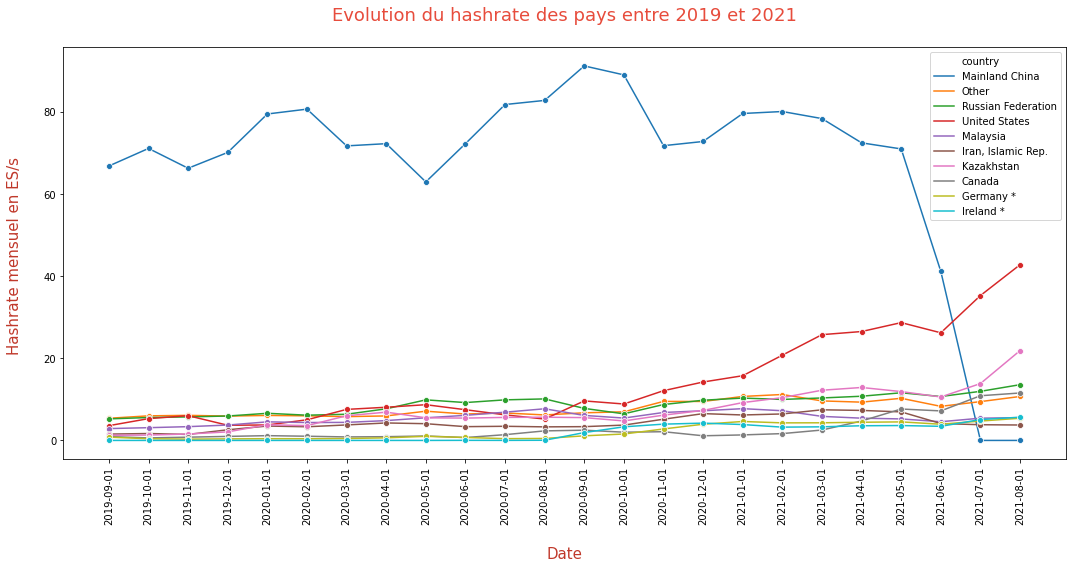

In [28]:
path_pays="https://raw.githubusercontent.com/GeoffroyENSAE/Cryptomonnaies-et-ecologie/main/hashrate_country_2019_2021.csv"
#on charge les données sur le Hashrate par pays
df=pd.read_csv(path_pays,sep=",")

#on représente l'évolution des Hashrates mensuels par pays 
plt.figure(figsize=(15,8))
sns.lineplot(x =df["date"], y = df["monthly_absolute_hashrate_EH/S"],hue = df["country"],  legend="brief", marker='o')

plt.xlabel('\nDate', fontsize=15, color='#c0392b')
plt.ylabel("Hashrate mensuel en ES/s \n", fontsize=15, color='#c0392b')
plt.title("Evolution du hashrate des pays entre 2019 et 2021\n", fontsize=18, color='#e74c3c')

plt.xticks(rotation=90)
plt.tight_layout()


<b> ANALYSE DE L'EVOLUTION DES HASHRATES </b>

Tout d'abord, les pays où l'on mine majoritairement les Bitcoins étaient jusqu'à récemment les deux premières puissances économiques mondiales : la Chine et les États-Unis. Avec un hashrate mensuel oscillant entre 60 et 80 ES/s, la Chine était largement en tête dans ce classement jusqu'en juillet 2021, alors que les États-Unis ne dépassaient pas un hashrate mensuel de 20 ES/s. On trouve aussi parmi les 5 pays de minage le Kazakhstan, la Russie et le Canada. Ces résultats confirment en partie nos deux hypothèses, donnant néanmoins davantage de poids à celle postulant que ce sont les pays les plus développés qui minent le plus, bien qu'on retrouve aussi des pays moins développés, comme le Kazakhstan donc mais aussi l'Iran, où les opportunités de minage sont plus restreintes mais aussi plus rentables 

Cependant, à compter de juin 2021, une décision politique de l'État chinois a complétement rabattu les cartes. Le gouvernement a en effet demandé aux compagnies d'életricité de ne plus fournir les activités de minage de cryptomonnaies, situées principalement dans la région de Sichuan. Si l'argument écologique a été avancé par les autorités, on peut aussi supposer une volonté de contrôler davantage ce type de monnaies décentralisées et universelles créées sur son territoire. Cette quasi-interdiction du minage a entraîné une chute drastique du hashraste mensuel chinois, nul désormais selon les données qui nous sont disponibles. 

Quels pays ont connu une évolution marquante de leur hashrate avec la fin du minage en Chine ? 

Les États-Unis ont déjà connu un boom de leur hashrate mensuel à partir de juin 2021, pour atteindre 40 ES/s, le double de leur score au début de l'année. On peut postuler que les États-Unis vont s'imposer comme le principal pays mineur de Bitcoin avec cet arrêt d'activité de la Chine. Au vu de son évolution récente, le Kazakhstan a aussi bénéficié de cet événement pour s'imposer comme une place forte du minage. 


En conclusion, la consommation d'électricité liée au minage du Bitcoin se concentre principalement sur certaines grandes puissances économiques, comme les États-Unis ou la Russie, bien que d'autres pays moins développés y participent aussi fortement comme le Kzakhstan. De par cette activité, les pays cités subissent un accroissement de leur impact environnemental, l'activité de minage s'ajoutant à l'ensemble des autres activités consommatrices d'électricité. Cet argument écologique a été avancé par la Chine, pour justifier son choix d' "interdire" le minage sur son territoire en 2021, alors qu'elle représentait alors le principal territoire de minage mondial. 

## III- Modélisation temporelle de la production de déchets électroniques dus au minage de Bitcoin 

> <b> III.1 - Méthodologie </b>

Tout d’abord, comme mentionné en introduction, la plupart des travaux scientifiques menés sur la problématique de l’impact environnemental des cryptomonnaies s’intéresse à l’empreinte énergétique du minage des cryptomonnaies. Cela se justifie par l’ampleur de cette empreinte énergétique, comparable à la consommation annuelle d’électricité de certains pays comme nous venons de le montrer. Cependant, l’impact environnemental des cryptomonnaies est en réalité pluriel, et nous allons ici explorer un des aspects moins connus de la pollution des cryptos : les déchets électroniques créés par le minage de cryptomonnaies, autrement dit l’ensemble des machines qui sont hors service pour miner. 

 Angle-mort de nombreuses études sur l’impact environnemental des cryptomonnaies, ce sujet a été traité récemment par A. De Vries et C.Stoll, dans leur article « Bitcoin’s growing e-waste problem », publié en Septembre 2021 dans le journal « Ressources, Conservation and Recycling »(1). Nous nous sommes inspirés de leur démarche pour créer un modèle de la production de déchets électroniques liés au minage de Bitcoin, seule cryptomonnaie étudiée par l’article mais aussi la plus populaire ce qui donne un véritable poids aux estimations. Nous nous appuierons sur la même base de données que celle de l’article(2), données publiques disponibles librement, présentent différentes machines de minage de Bitcoin et leurs caractéristiques (date de sortie, efficience énergétique, hashrate, puissance, poids). Nous aurions pu repartir de la base de données déjà utilisées précédemment dans le I, cependant une informations clé n’y était pas présente : le poids des machines. Bien que nous avons pensé dans un premier temps à joindre les deux bases, cela a été rendu complexe par le fait que les machines de minage présentes dans les deux bases étaient largement différentes. 


> <b>III.2 - Fonctionnement du modèle </b>

L’hypothèse fondamentale du modèle est que tant qu’une machine de minage est rentable, elle est conservée. Pour estimer cette rentabilité, imitant la démarche d’A.de Vries et C.Stoll, nous nous sommes intéressés aux <b> efficacités énergétiques </b> des machines et du réseau en général. Notion-clé en économie comme en thermodynamique, l’efficacité énergétique désigne ici le rapport entre ce que rapporte économiquement la machine (nombre de bitcoins vendus) et ce que cela coûte énergiquement (quantité d’électricité dépensée pour le minage). Si l’efficacité énergétique de chaque machine i est indiquée dans notre base de données (EE(i), en J / TH), il a fallu calculer celle du réseau correspondant au seuil de rentabilité de celui-ci, nommé BE*. Le calcul de cette variable, d’après la définition de l’efficacité énergétique, se fait comme suit :  

> <i> BE*  = (( BTCday . M ) / p.PUE.PA.24hrday) / (H .1000)

- <i> BTCday </i> = Total network rewards + fees for a given day, in Bitcoin [BTC]    
- <i> M </i> : Prix du marché, en US Dollar par Bitcoin [USD/BTC]
- <i> p </i> : Coût pour un kWh d’électricité consommé, en US Dollar par kilowatt- hour [USD/kWh] 
- <i> H </i> = Estimated network hashrate, in Terahash per second [TH/s)
- <i> PA </i> = Performance adjustment factor : Facteur exogène (égal à 1,05) 
- <i> PUE </i> = Power usage effectiveness factor : Facteur exogène 

> L’idée est qu’une machine est rentable tant que son efficacité énergétique est inférieure à celle du réseau correspondant au seuil de rentabilité : tant que <i> EE(i) ≤ BE*.

In [32]:
%run "./Récupération et nettoyage des données du modèle-2.ipynb"

<ipython-input-32-5bf19dc8d0d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BTC'][i]=3600
<ipython-input-32-5bf19dc8d0d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BTC'][i]=1800
<ipython-input-32-5bf19dc8d0d1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BTC'][i]=900
<ipython-input-32-2fa8926b2a51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

In [33]:
#Détermination de la durée de vie des machines en jours
resultat=[]
for i in range(2609):
    if df['Seuil'][i]>0:
        if df['Efficacité (J/Gh)'][i]>0:
            t=0
            while df['Efficacité (J/Gh)'][i]<df['Seuil'][t+i] and t+i<2608:
                t+=1
            resultat.append(t)
        
print(resultat)

[382, 906, 125, 692, 659, 528, 479, 505, 405, 446, 397, 384, 280, 216, 244, 185, 279, 209, 381, 251, 44, 123, 320, 299, 873, 288, 286, 225, 191, 150, 149, 225, 223, 89, 195, 192, 186, 127, 483, 453, 435, 156, 724, 718, 599, 418, 126, 354, 359, 0, 324, 327, 617, 443, 541, 540, 533, 532, 504, 378, 228, 439, 167, 102, 165, 396, 38, 371, 361, 221, 243, 67, 73, 308, 184, 283, 264, 277, 161, 150, 612, 137, 99, 40, 31, 12, 0, 0, 334, 245, 214, 213]


In [34]:
T = statistics.mean(resultat)
print("La durée de vie moyenne d'un appareil de minage est", T,"jours")

La durée de vie moyenne d'un appareil de minage est 305.8369565217391 jours


(0.0, 1.3)

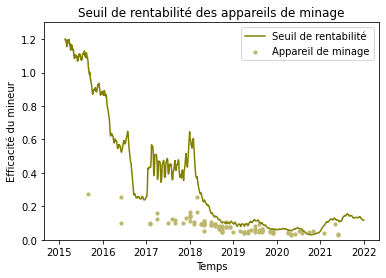

In [36]:
# Détermination de l'efficacité énergétique du seuil de rentabilité 
plt.plot(df['Date'],df['Seuil'],label='Seuil de rentabilité',color='olive')
plt.scatter(df['Date'],df['Efficacité (J/Gh)'],label='Appareil de minage',color='darkkhaki',s=10)
plt.title('Seuil de rentabilité des appareils de minage')
plt.legend()
plt.xlabel("Temps")
plt.ylabel("Efficacité du mineur")
plt.ylim([0,1.3])

Nous cherchons donc dans un premier temps à modéliser l’efficacité énergétique correspondant au seuil de rentabilité du réseau. Une fois cette courbe obtenue, nous pouvons déterminer la durée de vie de chaque machine. Sur cette deuxième figure, chaque point jaune correspond à l’efficacité énergétique d’une machine de minage en particulier. Tant que la droite horizontale passant par ce point ne croise pas la courbe associée au seuil de rentabilité, alors la i-ième machine est rentable, son efficacité énergétique étant inférieure à celle de la rentabilité. L’écart entre la date de sortie et la date où la droite horizontale coupe la courbe du seuil de rentabilité (i.e <i>EE(i) = BE*</i>) donne <b>l’espérance de vie d’une machine </b>. 



> Avec l'espérance de vie de chaque machine, et le poids de ces dernières, variable décisive présente dans notre base de données, on peut déterminer le poids d’équipements de minage jetés au fur et à mesure du temps : on obtient donc la <b> quantité des déchets électroniques </b> causée par le minage de Bitcoins.

Néanmoins, à la suite de la démarche de A.de Vries et C.Stoll, nous avons décidé de rapporter le poids de chaque équipement de minage à sa puissance de calcul / hashing (en Th/s). Ce faisant, une fois la machine hors d'usage, il faut multiplier ce poids en kg / Th / s par le hashrate du réseau à cette date de sortie de la machine (en Th/s), pour obtenir le poids d'équipement de minage gaspillé à cette date. L'idée fondamentale ici est que chaque machine a une participation différente au hashrate général, et qu'il convient de prendre en compte celle-ci pour estimer les déchets électroniques liés au minage. 

Text(0, 0.5, 'Hash Rate (H/s)')

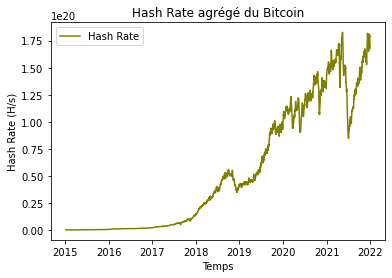

In [41]:
#Détermination du hashrate agrégé du Bitcoin 

df['Hash Rate']=df['Hash Rate'].rolling(7).mean()

plt.plot(df['Date'],df['Hash Rate'],label='Hash Rate',color='olive')
plt.title("Hash Rate agrégé du Bitcoin")
plt.legend()
plt.xlabel("Temps")
plt.ylabel("Hash Rate (H/s)")

In [39]:
# Détermination des déchets électroniques du minage
E_waste=[0 for i in range(2609)]
t=0
for i in range(len(E_waste)):
    if df['Efficacité (J/Gh)'][i]>0 and (i+resultat[t]<2609):
        E_waste[i+resultat[t]]=float(df['Poids (kg)'][i])/float(df['Hashing power (Th/s)'][i])*df['Hash Rate'][i+resultat[t]]*10**(-13)
        t+=1
        
for i in range(1,len(E_waste)):
    E_waste[i]+=E_waste[i-1]
    
E_waste

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


Text(0, 0.5, 'Poids (kg)')

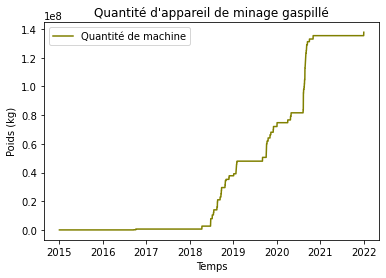

In [40]:
plt.plot(df['Date'],E_waste,label='Quantité de machine',color='olive')
plt.title("Quantité d'appareil de minage gaspillé")
plt.legend()
plt.xlabel("Temps")
plt.ylabel("Poids (kg)")

> <b> III.3 - Interprétation des résultats </b>



À la fin du III.2, nous obtenons donc la courbe représentant la somme cumulée des déchets électroniques liés au minage du Bitcoin. Celle-ci est égale à 0 jusqu'en 2018, du fait que les premières machines de notre base de données ne sont devenus plus rentables qu'à partir de cette date. 

Un premier résultat intéressant concerne la durée de vie moyenne des machines de minage. Celle-ci s'élève à 305 jours, ce qui signifie que les équipements de minage sont en moyenne <b>rentables un peu moins d'un an </b>. 

Le résultat fondamental de notre modèle est qu'en décembre 2021, les déchets électroniques liés au minage du Bitcoin depuis 2015 représentaient près de <b>1,4.10^8 kg </b>. Il est dur de se rendre précisément compte de l'ampleur de cette donnée. Cela constitue par exemple 2 fois le poids du Titanic ! 

Plus pratiquement, un pays comme la France a récolté 796 430 tonnes de déchets électroniques en 2018 (1), on se retrouve donc sur le même ordre de grandeur (10^8 kg). Autrement dit, les déchets électroniques liés au minage du Bitcoin représente un peu moins d'<b>1/4 des déchets électroniques annuels de la France </b>.


(1) Rapport annuel du registre des déchets d'équipements électriques et électroniques, ADEME, 2018

> <b> III.3 - Limites du modèle </b>

2 limites principales identifiées : 

- Hypothèse fondamentale du modèle : les machines qui ne sont plus rentables sont hors-service et deviennent des déchets électroniques. Or, on pourrait supposer une ré-utilisation de l’ensemble ou d’une partie des machines de minage, voire même un recyclage de celles-ci. Inconvénient de ce point : recherche scientifique extrêmement faible sur ces pratiques. 

- Modèle centré uniquement sur les bitcoins. Certes, c’est la crypto la plus échangée et la plus minée, mais il pourrait être intéressant d’étendre cette analyse à un nombre plus élevé de cryptos pour avoir une estimation plus précise de l’impact environnemental des déchets électroniques liées aux cryptos. La solution serait d’avoir une base de données plus larges, mais celle-ci est complexe à établir, à cause de l’importance du nombre de machines de minages et des crypto monnaies différents. 

## Conclusion

> <b> Bilan </b>

Finalement, les cryptomonnaies, et en tête de celles-ci le Bitcoin, ont un impact environnemental si néfaste à cause du fonctionnement du minage. 

L'impact écologique le plus important de ce processus vient du fait qu'il nécessite une consommation d'électricité forte (73,3 TWh / an selon nos calculs), comparable à celles de nombreux pays comme Chili et la Colombie et représentant près de 27,7% de la consommation d'électricité française. Le minage se concentrant principalement dans certains pays, comme les États-Unis ou le Kazakhstan, il alourdit considérablement l'empreinte énergétique de ceux-ci. C'est la raison invoquée par la Chine, géant mondial du minage de cryptomonnaies jusqu'à juin 2021, pour interdire ce processus sur son territoire. 

Mais cet impact écologique du minage des cryptomonnaies ne se résume pas à la seule consommation d'électricité. Nous en avons étudié un autre angle avec la production de déchets électroniques liée au minage, c'est-à-dire l'ensemble des machines de minages hors d'usage car plus rentables. Nous avons estimé que ces déchets électroniques représentaient 1,4.10^8 kg depuis 2015, soit un peu près 1/4 des déchets électroniques français annuels. 

> <b> Limites </b> 

Bien que nous ayons réussi à traiter les trois enjeux majeurs que nous avions identifiés en introduction, notre étude montre certaines limites analytiques. La majeure d'entre elles vient de notre choix de nous intéresser principalement à l'impact environnemental du Bitcoin. Cela est justifié par le fait que la plupart des données utilisables que nous avons trouvées concernaient le Bitcoin. Même si cela ne reflète donc pas exactement l'ampleur de l'impact environnemental des cryptomonnaies, nous avons jugé que nos résultats le Bitcoin, étant la plus populaire et la plus échangée des cryptomonnaies, permettraient déjà de concevoir l'échelle des dégâts environnementaux liés au minage des cryptomonnaies. D'autre part, nous avons centré nos travaux essentiellement sur la problématique du minage, sans considérer que les échanges de cryptomonnaies nécessitaient elles-mêmes une consommation d'électricité. Nous aurions aimé pouvoir faire une analyse de l'impact environnemental de chaque étape de vie des cryptomonnaies, mais les données sur l'empreinte énergétique des transactions de cryptomonnaies sont très complexes à trouver, peut-être parce qu'elle est négligeable par rapport à celle du minage.

> <b> Évolutions et solutions </b>

Comme nous avons pu le voir, l'évolution de la consommation d'électricité et de la production de déchets électroniques dépend intimimement de la courbe d'évolution du hashrate.Or, celle-ci connaît une évolution à la hausse depuis plusieurs années et nous n'avons pas identifier de raisons pour lesquelles cette croissance du hashrate pourrait s'arrêter. L'évolution la plus probable, dans l'hyptohèse d'un statu quo technologique, serait donc une augmentation de la consommation d'électricité annuelle et des déchets électroniques liées au minage des cryptomonnaies. 

Cependant, le minage des cryptomonnaies pourrait connaître des évolutions importantes dans les années à venir, allant dans le sens d'un impact écologique nettement affaibli, portant sur les systèmes de validation du minage. Un système de validation permet de sécuriser une blockchain en fournissant les bonnes incitations économiques pour pousser à une validation honnête des transactions. Si aujourd'hui le minage repose principalement sur un système de validation par PoW (Proof of Work, preuve de travail), très coûteux en énergie et demandeur en équipements, certaines cryptomonnaies se lancent dans le PoS (proof of stake), qui nécessite une consommation largement inférieure d'électricité. À titre d'exemple, la Cardano est aujourd'hui la cryptomonnaie la plus populaire utilisant cette stratégie, et elle engendre une consommation d'électricité de seulement 6 GWh par an. L'Ethereum, deuxième cryptomonnaie échangée au monde, a annoncé récemment sa volonté de changer son système de validation, pour passer du PoW ou PoS. Cette conversion des grandes cryptomonnaies vers le PoS constitue le point de rupture qui pourrait permettre aux cryptomonnaies de largement réduire leur impact environnemental. 

 